# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")


# Load and Inspect data

In [3]:
#  Load the dataset
data = pd.read_csv(r"C:\Users\ansar\Downloads\bank_transactions.csv")

In [4]:
# explore the dataset
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [61]:
# Convert the "TransactionDate" column to datetime format
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format="%d-%m-%Y")

In [62]:
# Drop rows with missing values
data.dropna(inplace=True)

In [63]:
# Select numeric features for clustering
numeric_features =data[[
    "TransactionAmount (INR)",
    "CustAccountBalance",]]

In [64]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [65]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

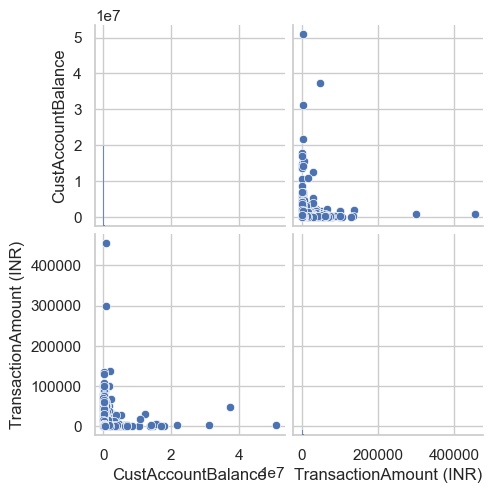

In [66]:
# Plot a pairplot to visualize the relationship between numeric features
sns.pairplot(data[[ 'CustAccountBalance','TransactionAmount (INR)']])

In [67]:
# using elbow method to find the optimal number of clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++' ,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

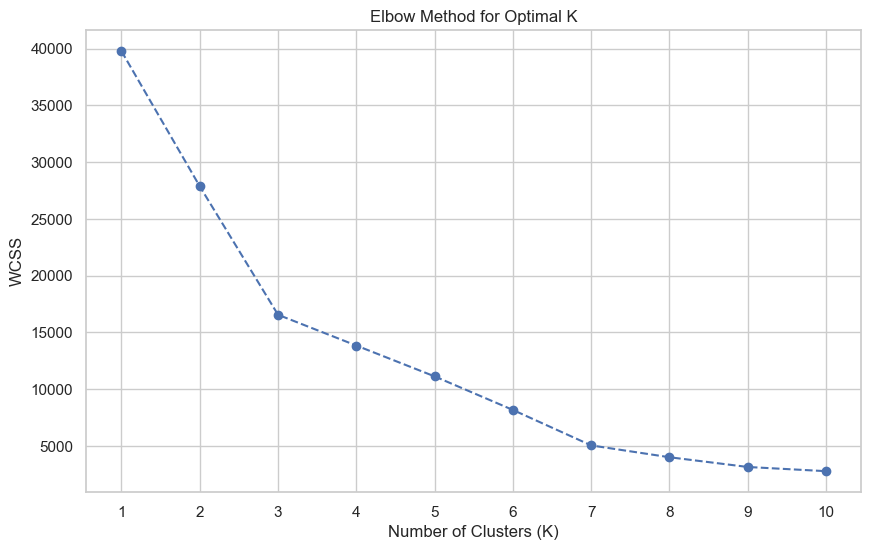

In [68]:
# plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [69]:
# based on the elbow method, we can choose K=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

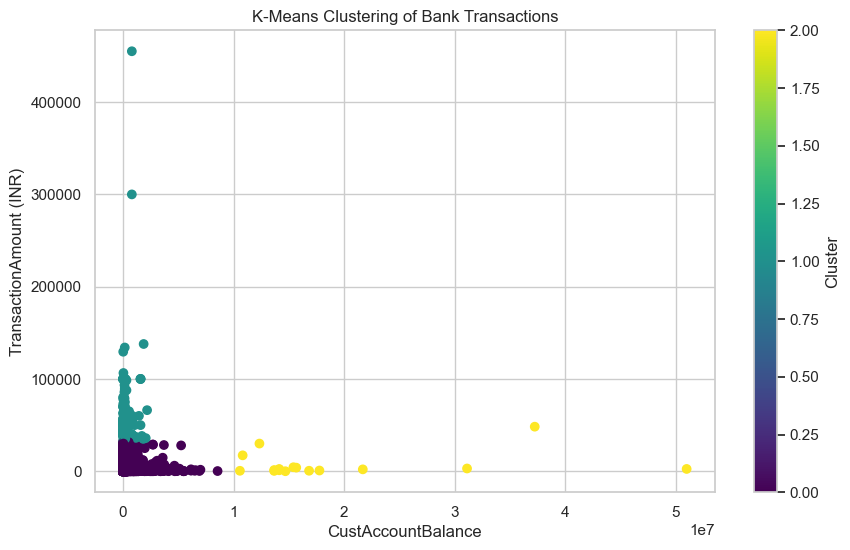

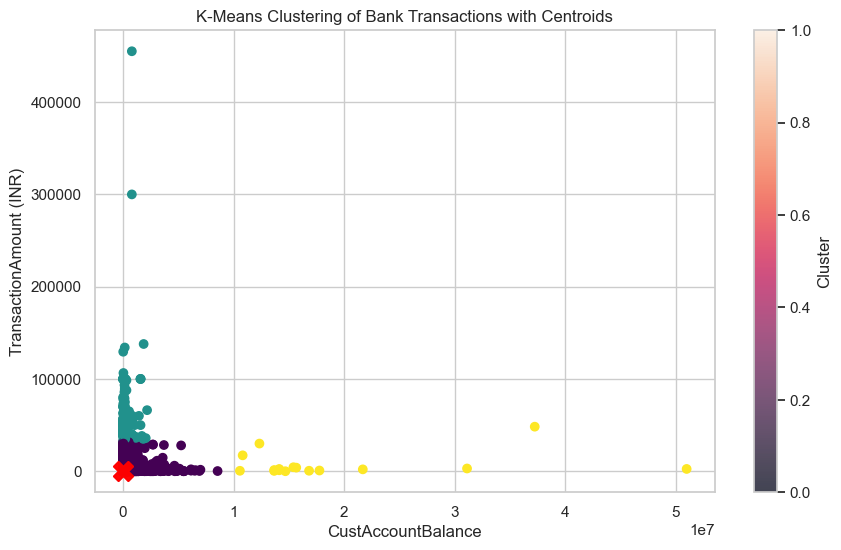

In [70]:
# visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    data["CustAccountBalance"],
    data["TransactionAmount (INR)"],
    c=data["Cluster"],
    cmap="viridis",
)
plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.title("K-Means Clustering of Bank Transactions")
plt.colorbar(label="Cluster")
plt.show()
# visualize the clusters with centroids
plt.figure(figsize=(10, 6))
plt.scatter(
    data["CustAccountBalance"],
    data["TransactionAmount (INR)"],
    c=data["Cluster"],
    cmap="viridis",
)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, alpha=0.75, marker="X")
plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.title("K-Means Clustering of Bank Transactions with Centroids")
plt.colorbar(label="Cluster")
plt.show()

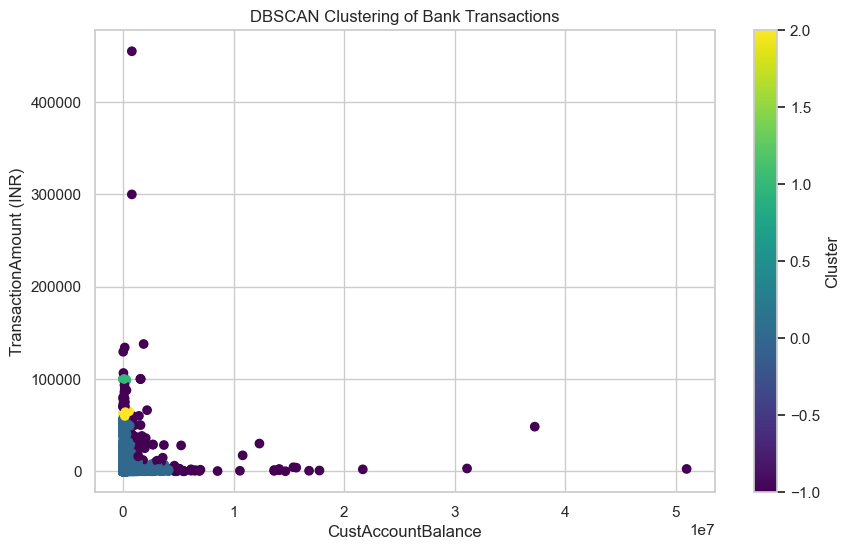

In [71]:
db = DBSCAN(eps=0.5, min_samples=10).fit(scaled_features)
data['db_labels'] = db.labels_

plt.figure(figsize=(10, 6))
plt.scatter(
    data["CustAccountBalance"],
    data["TransactionAmount (INR)"],
    c=data["db_labels"],
    cmap="viridis",
)
plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.title("DBSCAN Clustering of Bank Transactions")
plt.colorbar(label="Cluster")
plt.show()

In [72]:
silhouette_score(scaled_features, db.labels_)

0.9363426307777846

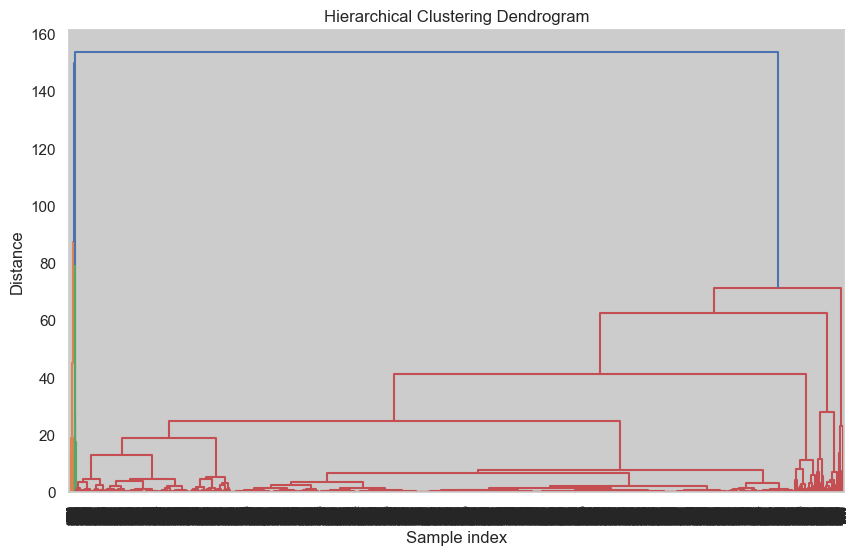

In [73]:
# Hierarchical clustering
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [74]:
# end